# AI for Medical Diagnosis
Computer Vision (CV) has a lot of applications in medical diagnosis:

* Dermatology
* Ophthakmology
* Histopathology.

X-rays images are critical for the detection of lung cancer, pneumenia ... In this notebook you will learn:

* Data pre-processing
* Preprocess images properly for the train, validation and test sets.
* Set-up a pre-trained neural network to make disease predictions on chest X-rays.

In this notebook you will work with chest X-ray images taken from the public ChestX-ray8 dataset.

# What is Pneumonia ?
From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

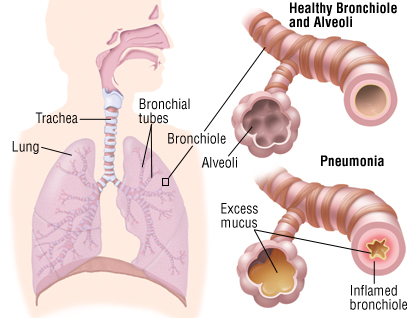

# Computer Vision


Computer vision is an interdisciplinary scientific field that deals with how computers can gain a high-level understanding from digital images or videos. From the perspective of engineering, it seeks to understand and automate tasks that the human visual system can do.
We can use Computer Vision to determine whether a person is affected by pneumonia or not.

VGG16, also known as the Visual Geometry Group 16, is a convolutional neural network (CNN) architecture that was developed by the Visual Geometry Group at the University of Oxford. It was introduced in the paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman in 2014.

The VGG16 architecture is widely used for image classification tasks. It consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers. The convolutional layers are followed by max-pooling layers that downsample the spatial dimensions of the input.

One of the key features of VGG16 is its simplicity and uniformity. It uses 3x3 filters throughout the convolutional layers, which enables a deeper network while keeping the number of parameters manageable. The authors found that using smaller filters multiple times is more effective than using larger filters less frequently.

VGG16 achieved remarkable performance in the ImageNet Large-Scale Visual Recognition Challenge 2014, where it achieved the first place in the localization task and second place in the classification task. Its success and simplicity have made it a popular choice as a pre-trained model for various computer vision tasks, such as feature extraction, transfer learning, and fine-tuning on new datasets.

It's important to note that while VGG16 was a significant contribution to the field of computer vision, newer architectures like ResNet, Inception, and EfficientNet have surpassed its performance on various benchmark datasets. However, VGG16 still serves as a valuable benchmark and a foundation for understanding convolutional neural networks.

CNN models, or Convolutional Neural Network models, are a class of deep learning models specifically designed for processing structured grid-like data, such as images. CNNs have revolutionized the field of computer vision by achieving remarkable performance in tasks such as image classification, object detection, and image segmentation.

Here are some notable CNN models:

1. LeNet-5: LeNet-5, developed by Yann LeCun in the 1990s, was one of the pioneering CNN architectures. It consists of multiple convolutional layers, pooling layers, and fully connected layers. LeNet-5 was primarily used for handwritten digit recognition tasks.

2. AlexNet: AlexNet, introduced by Alex Krizhevsky et al. in 2012, was the breakthrough model that popularized deep learning and CNNs. It won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012. AlexNet has a deep architecture with multiple convolutional layers and fully connected layers, utilizing techniques such as ReLU activation and dropout regularization.

3. VGGNet: The Visual Geometry Group (VGG) Network, proposed by Simonyan and Zisserman in 2014, consists of a series of convolutional layers with small 3x3 filters, followed by max pooling layers. VGGNet is known for its simplicity and uniform architecture, with variants like VGG16 and VGG19 having 16 and 19 layers, respectively.

4. GoogLeNet: GoogLeNet, also known as InceptionNet, was introduced by Szegedy et al. from Google in 2014. It introduced the inception module, which performs parallel convolutions at different scales and concatenates their outputs. GoogLeNet achieved high accuracy while reducing the number of parameters.

5. ResNet: ResNet, developed by He et al. in 2015, addressed the problem of vanishing gradients in very deep networks. ResNet introduced skip connections or residual connections, allowing the network to learn residual mappings. ResNet architectures, such as ResNet-50 and ResNet-101, have achieved state-of-the-art performance in various tasks.

6. DenseNet: DenseNet, proposed by Huang et al. in 2016, introduced a dense connectivity pattern where each layer is connected to every other layer in a feed-forward manner. DenseNet promotes feature reuse, alleviates the vanishing gradient problem, and reduces the number of parameters.

7. EfficientNet: EfficientNet, introduced by Tan and Le in 2019, focuses on balancing model size and computational efficiency. It employs a compound scaling method to optimize the model's depth, width, and resolution simultaneously, resulting in highly efficient and accurate models.

These are just a few examples of CNN models that have made significant contributions to the field of computer vision. Each model has its unique architectural design choices, and their performance varies depending on the specific task and dataset. Researchers often use pre-trained versions of these models, trained on large datasets like ImageNet, as a starting point for transfer learning in various applications.

# Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be realized using Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

# The convolution process is illustrated below

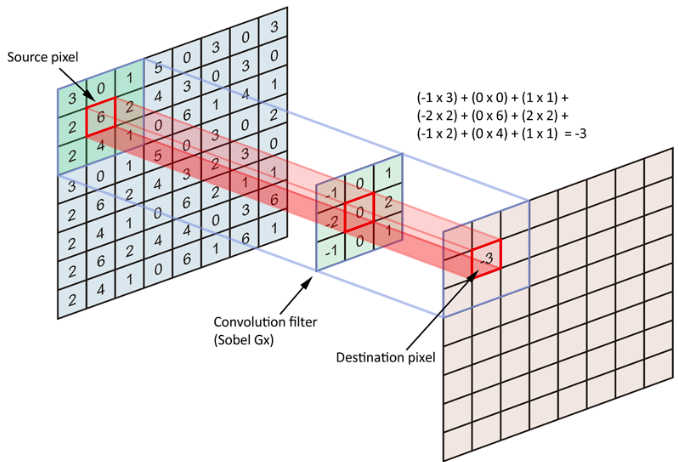

Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

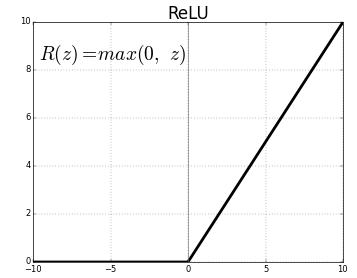

Features are the enhanced with MaxPool layers
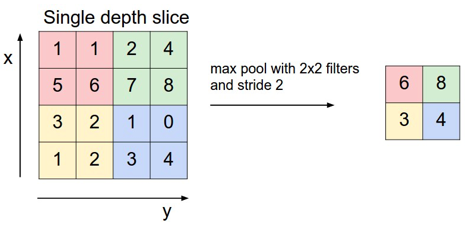

The stride parameters determines the distance between each filters. The padding one determines if we ignore the borderline pixels or not (adding zeros helps the neural network to get information on the border)

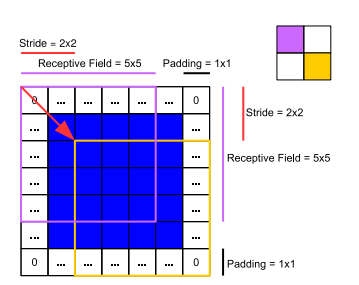

The outputs are then concatened in Dense layers

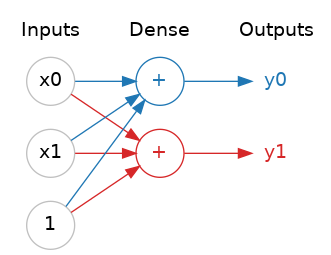

By using a sigmoid activation, the neural network determines which class the image belongs to
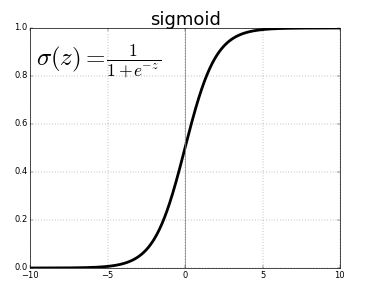

#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [1]:
#pip install tensorflow

In [107]:
#pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install gradio

In [1]:
# importing necessary libraries
import numpy as np
import gradio as gr
import os
import matplotlib.pyplot as plt
from random import randint
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
os.listdir("C:/Users/Addisu/Desktop/project/data")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['test', 'train', 'val']

In [2]:
len(os.listdir("C:/Users/Addisu/Desktop/project/data/train/PNEUMONIA"))

3406

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
PNEUMONIA=3406
NORMAL=805
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=2916
NORMAL=536


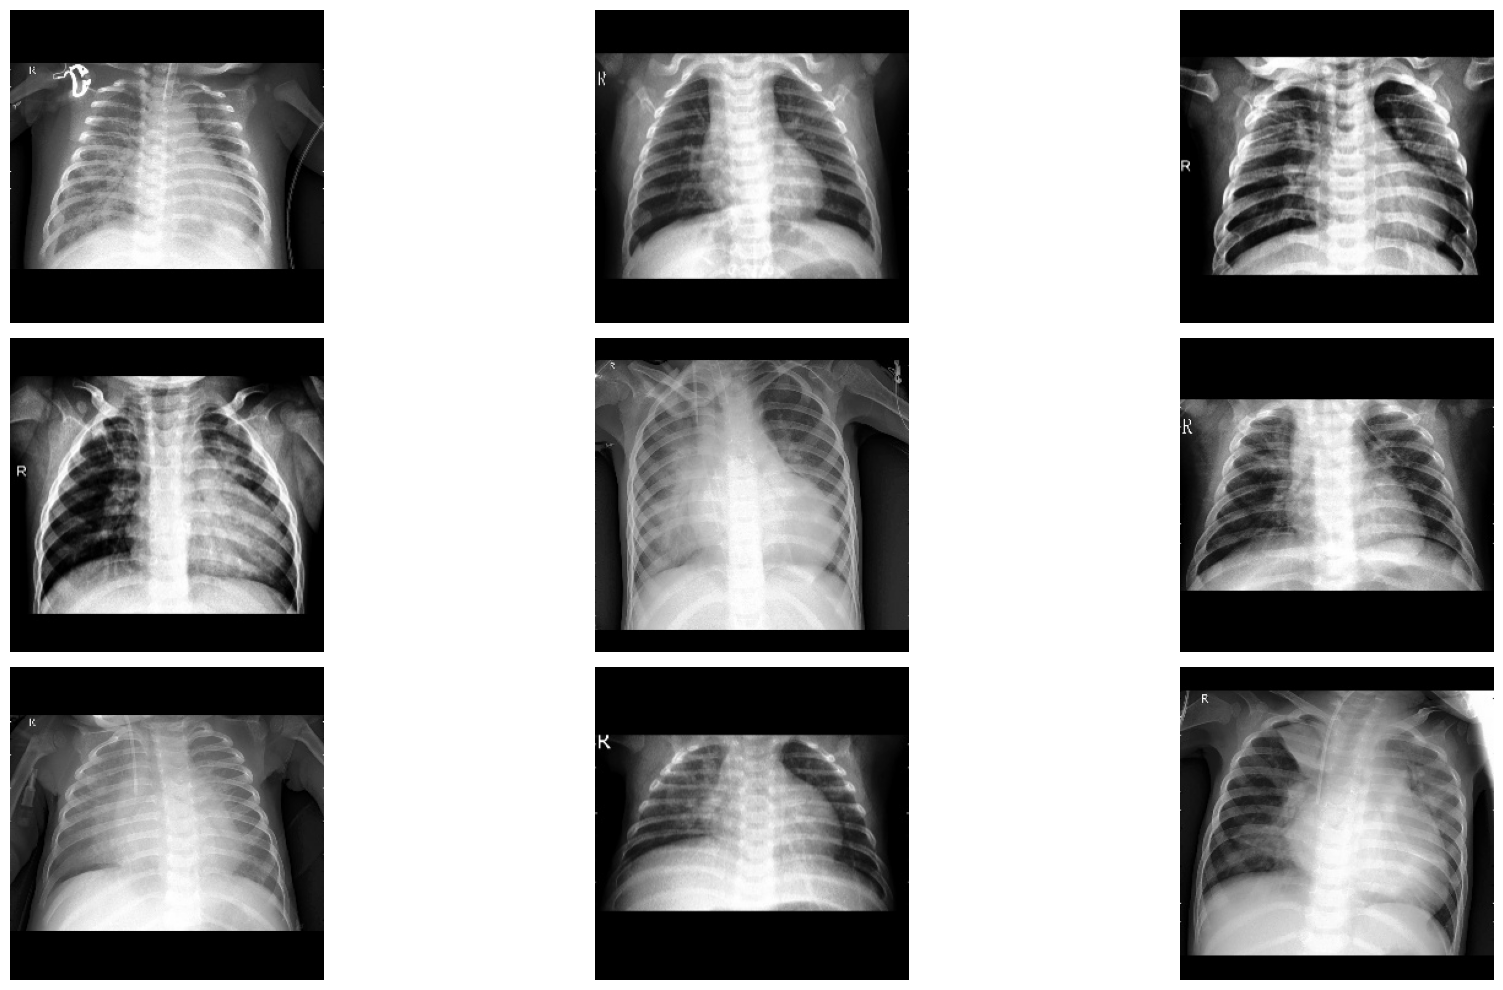

In [3]:
train_dir = "C:/Users/Addisu/Desktop/project/data/train"
test_dir = "C:/Users/Addisu/Desktop/project/data/test"
val_dir = "C:/Users/Addisu/Desktop/project/data/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'pneumonia')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("C:/Users/Addisu/Desktop/project/data/train/PNEUMONIA")
pneumonia_dir = "C:/Users/Addisu/Desktop/project/data/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

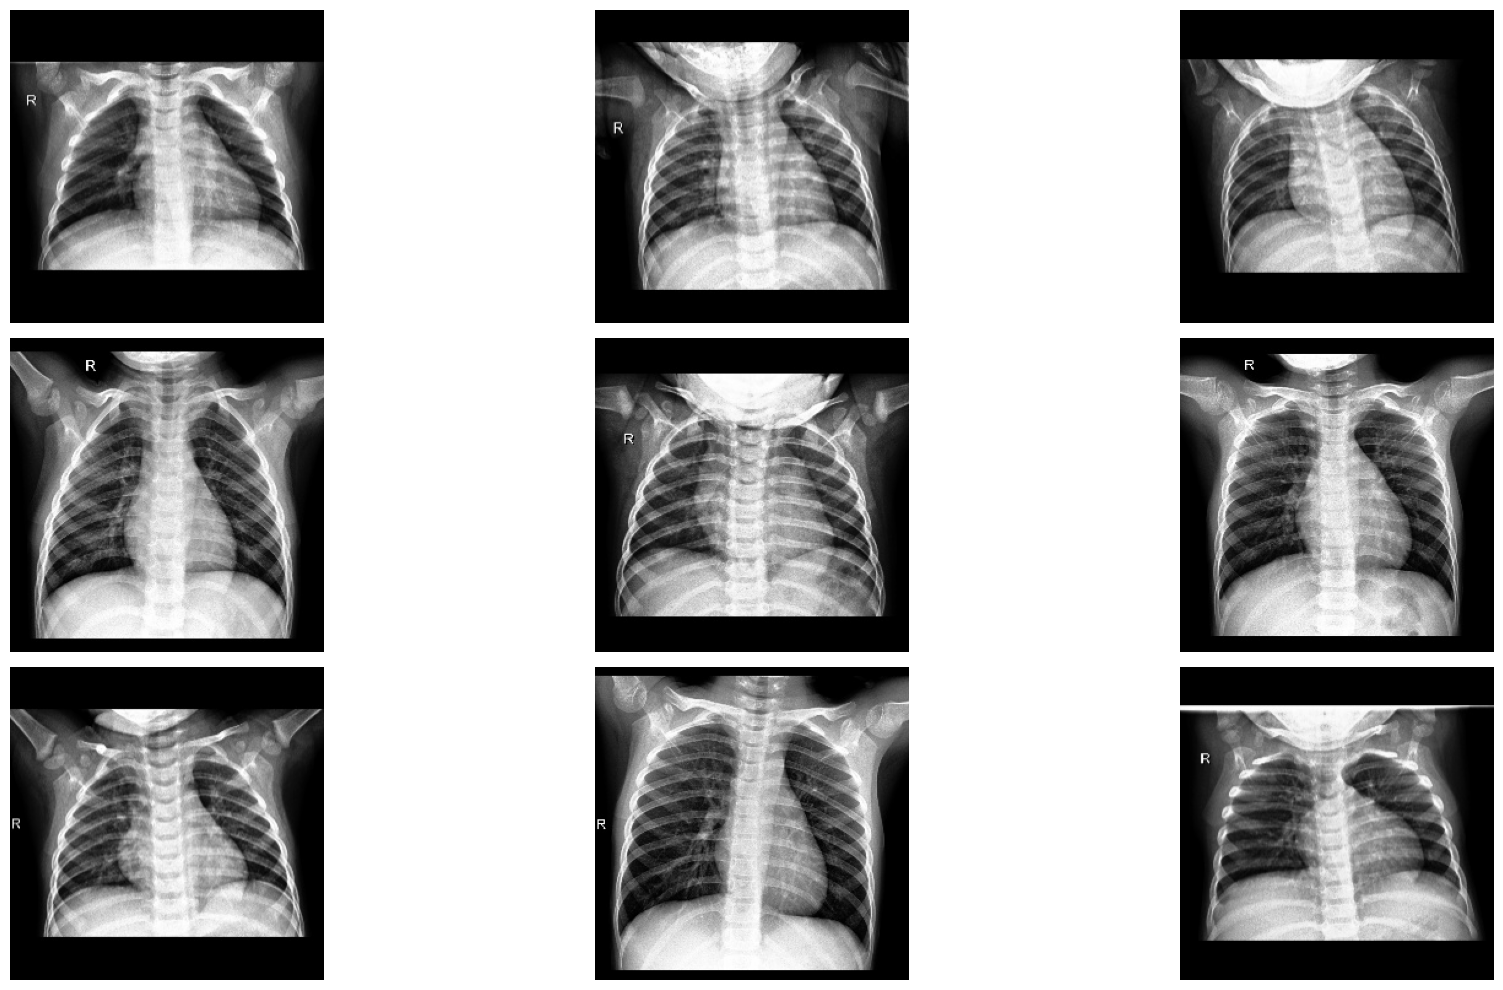

In [4]:
normal = os.listdir("C:/Users/Addisu/Desktop/project/data/train/NORMAL")
normal_dir = "C:/Users/Addisu/Desktop/project/data/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 256 pixels width and 256 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 79.7602 and the standard deviation is 84.6479


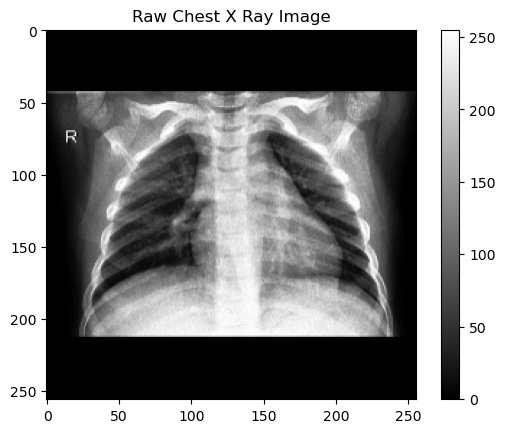

In [5]:
normal_img = os.listdir("C:/Users/Addisu/Desktop/project/data/train/NORMAL")[0]
normal_dir = "C:/Users/Addisu/Desktop/project/data/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

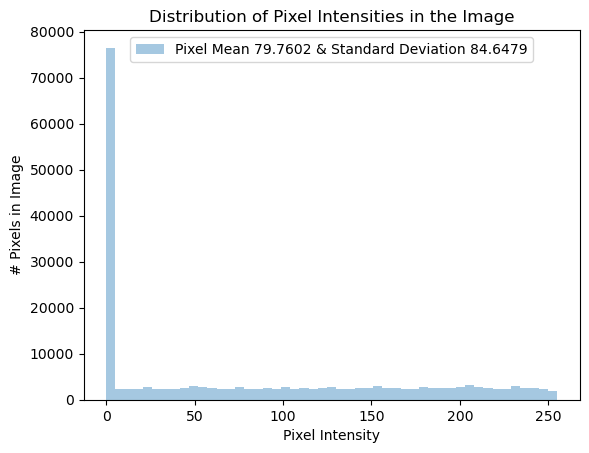

In [7]:
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing import image
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [10]:
#pip install ImageDataGenerator

In [11]:
#pip install tensorflow keras

In [12]:
#pip install tf-models-official.

In [13]:
#pip install ImageDataGenerator

In [14]:
#pip install tensorflow

In [15]:
#pip install "numpy>=1.16.5,<1.23.0"

In [8]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
#from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

Now we need to build a new generator for validation and t esting data.

Why can't use the same generator as for the training data?

Look back at the generator we wrote for the training data.

It normalizes each image per batch, meaning thatit uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

In [9]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 4211 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
#import seaborn as sns

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.1121 and the minimum is -1.4249
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


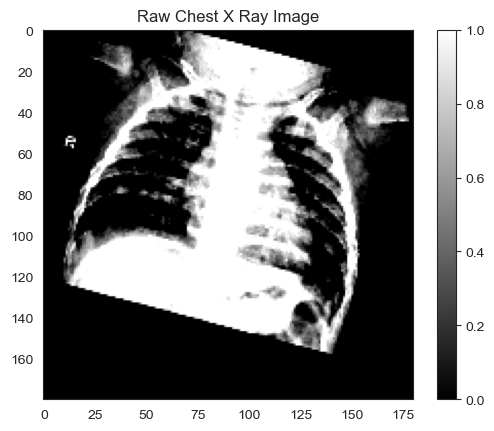

In [10]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

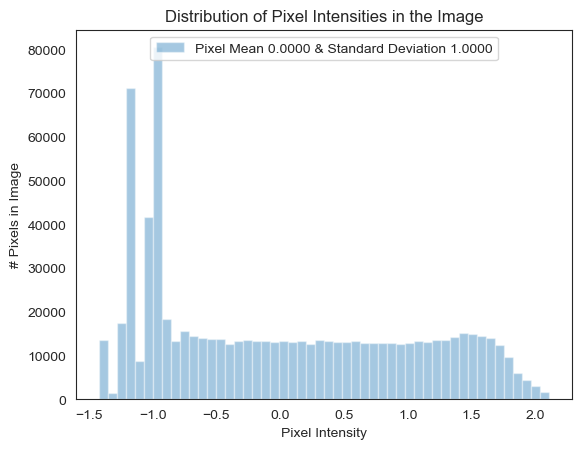

In [11]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [12]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.81
Weight for class 1: 0.19


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

C:\Users\Addisu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 176, 176, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 86, 86, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 40, 40, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 40, 40, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 38, 38, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 38, 38, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,914,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,203,681 (23.67 MB)

 Trainable params: 6,202,785 (23.66 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10


C:\Users\Addisu\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7908 - loss: 0.9816 - val_accuracy: 0.1200 - val_loss: 4.0009
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8058 - loss: 0.1292 - val_accuracy: 0.0000e+00 - val_loss: 5.7503
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7985 - loss: 0.1629 - val_accuracy: 0.6800 - val_loss: 0.5244
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8017 - loss: 0.1083 - val_accuracy: 0.8400 - val_loss: 0.4722
Epoch 5/10
 26/100 ━━━━━━━━━━━━━━━━━━━━ 2:05 2s/step - accuracy: 0.8608 - loss: 0.1143

Text(0.5, 1.0, 'Accuracy Evolution')

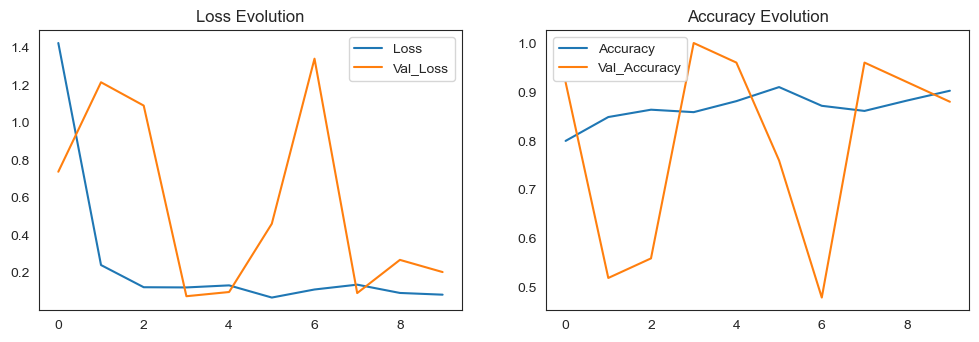

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [26]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 72s 116ms/step - accuracy: 0.5769 - loss: 0.9406
Test Accuracy: 76.44%
527/527 ━━━━━━━━━━━━━━━━━━━━ 206s 391ms/step - accuracy: 0.9375 - loss: 0.1663
Train Accuracy: 93.80%


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step
[[ 95 139]
 [  8 382]]


,0,1,accuracy,macro avg,weighted avg
precision,0.922330,0.733205,0.764423,0.827768,0.804127
recall,0.405983,0.979487,0.764423,0.692735,0.764423
f1-score,0.563798,0.838639,0.764423,0.701219,0.735574
support,234.000000,390.000000,0.764423,624.000000,624.000000


In [28]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[151  83]
 [ 21 369]]


,0,1,accuracy,macro avg,weighted avg
precision,0.877907,0.816372,0.833333,0.847139,0.839447
recall,0.645299,0.946154,0.833333,0.795726,0.833333
f1-score,0.743842,0.876485,0.833333,0.810163,0.826744
support,234.000000,390.000000,0.833333,624.000000,624.000000


# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

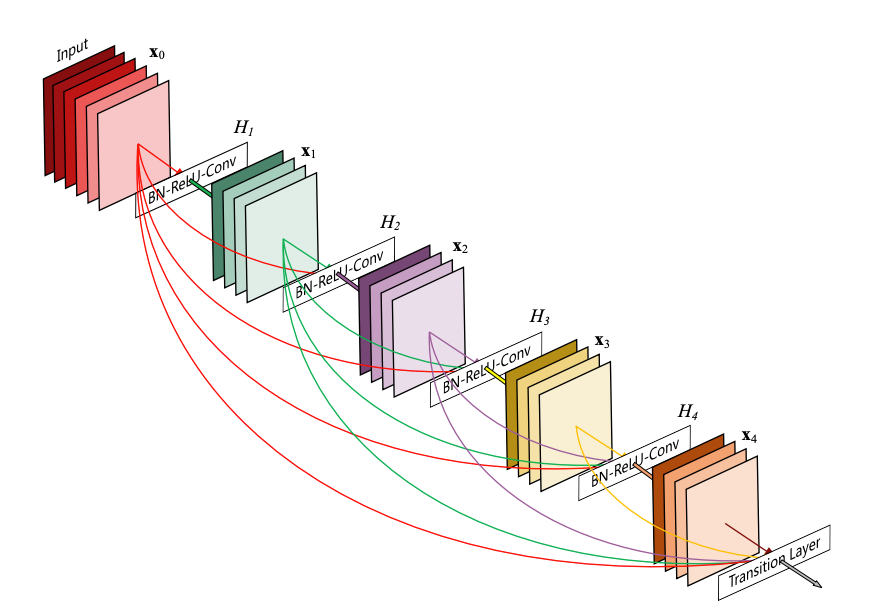

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [29]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 186, 186,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 45, 45,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 45, 45,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 45, 45,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 45, 45,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 45, 45,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 45, 45,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [30]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [31]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape <KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=None, name=keras_tensor_191>
The output shape <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_618>


In [32]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [33]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 713s 5s/step - accuracy: 0.7693 - loss: 0.1818 - val_accuracy: 0.8000 - val_loss: 0.3291
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.8503 - loss: 0.0988 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.8633 - loss: 0.0982 - val_accuracy: 0.6000 - val_loss: 0.9645
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.9025 - loss: 0.0717 - val_accuracy: 0.9200 - val_loss: 0.2939
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.9194 - loss: 0.0623 - val_accuracy: 0.9600 - val_loss: 0.0916
Epoch 6/10
 27/100 ━━━━━━━━━━━━━━━━━━━━ 4:24 4s/step - accuracy: 0.8536 - loss: 0.1199

C:\ProgramData\Anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8557 - loss: 0.1088 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.9027 - loss: 0.0645 - val_accuracy: 0.7600 - val_loss: 0.6328
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.8816 - loss: 0.0816 - val_accuracy: 0.8800 - val_loss: 0.2166
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.8944 - loss: 0.0910 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.9248 - loss: 0.0507 - val_accuracy: 1.0000 - val_loss: 0.0049


Text(0.5, 1.0, 'Accuracy Evolution')

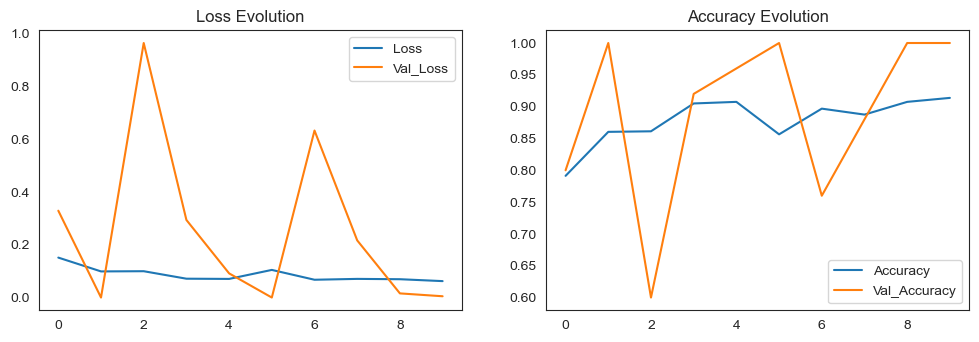

In [34]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [35]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 175s 279ms/step - accuracy: 0.8322 - loss: 0.5251
Test Accuracy: 82.85%
527/527 ━━━━━━━━━━━━━━━━━━━━ 450s 852ms/step - accuracy: 0.8472 - loss: 0.4682
Train Accuracy: 84.56%


# Evaluation

In [36]:
predicted_vals = model.predict(test, steps=len(test))

624/624 ━━━━━━━━━━━━━━━━━━━━ 194s 266ms/step


In [37]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[189  45]
 [ 59 331]]


,0,1,accuracy,macro avg,weighted avg
precision,0.762097,0.880319,0.833333,0.821208,0.835986
recall,0.807692,0.848718,0.833333,0.828205,0.833333
f1-score,0.784232,0.864230,0.833333,0.824231,0.834231
support,234.000000,390.000000,0.833333,624.000000,624.000000


# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

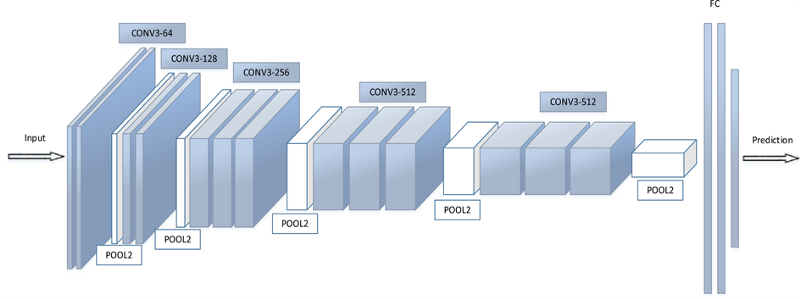

In [38]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

    


In [39]:
vgg16_base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:


    vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [41]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [43]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)



Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1052s 10s/step - accuracy: 0.7836 - loss: 0.1337 - precision: 0.9497 - recall: 0.7698 - val_accuracy: 1.0000 - val_loss: 0.1920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5755s 58s/step - accuracy: 0.7898 - loss: 0.1239 - precision: 0.9609 - recall: 0.7741 - val_accuracy: 0.0000e+00 - val_loss: 7.7548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1025s 10s/step - accuracy: 0.8140 - loss: 0.1186 - precision: 0.9663 - recall: 0.8036 - val_accuracy: 1.0000 - val_loss: 5.1144e-04 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1021s 10s/step - accuracy: 0.8241 - loss: 0.1249 - precision: 0.9662 - recall: 0.8066 - val_accuracy: 0.2400 - val_loss: 1.2065 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1011s 10s/step - accuracy: 0.8319 - loss: 0.1223 - precision: 0.9639

Text(0.5, 1.0, 'Accuracy Evolution')

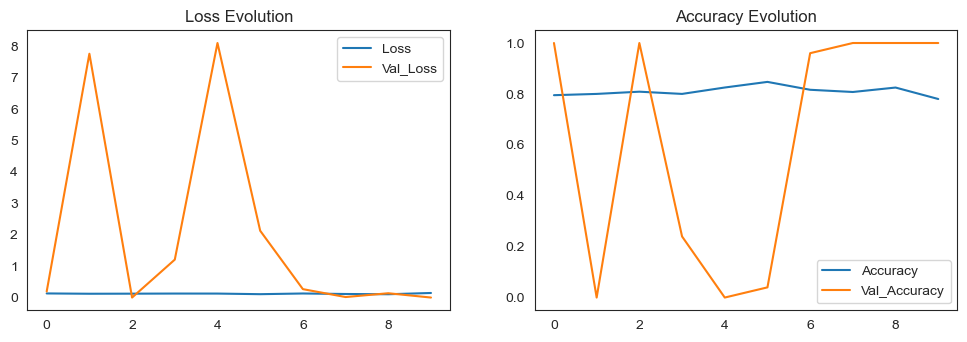

In [44]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [45]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 ━━━━━━━━━━━━━━━━━━━━ 497s 795ms/step - accuracy: 0.7417 - loss: 1.4816 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 37.50%
527/527 ━━━━━━━━━━━━━━━━━━━━ 1166s 2s/step - accuracy: 0.1826 - loss: 4.8385 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 19.12%


In [3]:
#to Save the trained model
#vgg16_base_model.save('model.h5')

In [102]:
#from PIL import Image 
#import numpy as np 
#mage_array = np.assaray(Image.open("C:/Users/Addisu/Desktop/project/data")

In [103]:
#from tensorflow.keras import Model

In [1]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Flask==2.1.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 95.2/95.2 kB 494.0 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [3]:
#Save the trained model
model.save('Pneumonia_pred_model_1.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the Keras model (.keras format)
keras_model = load_model('Pneumonia_pred_model_1.keras')


# Save the model in HDF5 format (.h5)
keras_model.save('Pneumonia_pred_model_1.h5')


In [15]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set the number of classes and other hyperparameters
num_classes = 4
batch_size = 32
epochs = 10

# Load the trained MobileNet model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Create the GUI window
window = tk.Tk()
window.title("Pneumonia Detection")
window.geometry("400x400")

# Center the window
window.eval('tk::PlaceWindow . center')

# Change the background color
window.configure(bg="#F0F0F0")  # Set background color to light gray

# Create a label with custom font color
label = tk.Label(window, text="Deep Learning Based Pneumonia Detection", fg="#FF0000")  # Set font color to red
label.pack()

# Function to handle login button click
def login():
    username = username_entry.get()
    password = password_entry.get()
    
    # Check the username and password
    if username == "admin" and password == "password":
        # Enable image processing buttons
        login_frame.pack_forget()
        browse_frame.pack()
    else:
        # Show an error message for invalid credentials
        result_label.configure(text="Invalid username or password")

# Function to browse and display the selected image
def browse_image():
    global file_path
    file_path = filedialog.askopenfilename()
    img = Image.open(file_path)
    backbuttonimg = ImageTk.PhotoImage(img)
    img = img.resize((224, 224))  # Resize the image to match MobileNet input size
    img = ImageTk.PhotoImage(img)
    image_label.configure(image=img)
    image_label.image = img

# Function to process and classify the selected image
def process_image():
    global file_path
    img = Image.open(file_path)
    img = img.resize((224, 224))  # Resize the image to match MobileNetV2 input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict the class of the image using the trained model
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    
    # Map class index to class names
    class_names = [ 'Pneumonia', 'Normal']
    predicted_class = class_names[class_index]

    # Display the result
    result_label.configure(text="Predicted Class: " + predicted_class)

# Create a login interface
login_frame = tk.Frame(window)
login_frame.pack(pady=20)

# Username label and entry
username_label = tk.Label(login_frame, text="Username:")
username_label.grid(row=0, column=0, padx=10, pady=10)
username_entry = tk.Entry(login_frame)
username_entry.grid(row=0, column=1, padx=10, pady=10)

# Password label and entry
password_label = tk.Label(login_frame, text="Password:")
password_label.grid(row=1, column=0, padx=10, pady=10)
password_entry = tk.Entry(login_frame, show="*")
password_entry.grid(row=1, column=1, padx=10, pady=10)

# Login button
login_button = tk.Button(login_frame, text="Login", command=login)
login_button.grid(row=2, columnspan=2, padx=10, pady=10)

# Create a frame for browsing and processing the image
browse_frame = tk.Frame(window)

# Create a button to browse and select an image
browse_button = tk.Button(browse_frame, text="Browse Image", command=browse_image)
browse_button.pack()

# Create a label to display the selected image
image_label = tk.Label(browse_frame)
image_label.pack()

# Create a button to process the selected image
process_button = tk.Button(browse_frame, text="Process Image", command=process_image)
process_button.pack()

In [ ]:
# Create a label to display the result
result_label= tk.Label(browse_frame)
result_label.pack()

# Start the GUI event loop
window.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Addisu\AppData\Local\Temp\ipykernel_8588\3873751196.py", line 82, in process_image
    predicted_class = class_names[class_index]
IndexError: list index out of range
